<div class='alert alert-block alert-warning
            ' style="font-size: 15pt; font-family: cursive; color: #08415C"> 
    <b> <center>Import libraries</center> </b>
</div>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('iris.data')
df

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
'''df.rename(columns={'Iris-setosa': 'class', '5.1': 'sepal length',
                     '3.5': 'sepal width', '1.4': 'petal length', 
                     '0.2': 'petal width'}, inplace=True)
df'''

"df.rename(columns={'Iris-setosa': 'class', '5.1': 'sepal length',\n                     '3.5': 'sepal width', '1.4': 'petal length', \n                     '0.2': 'petal width'}, inplace=True)\ndf"

In [4]:
# df.set_index('class', inplace=True)
# df

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df['sepal length'].describe()

count    150.000000
mean       5.843333
std        0.828066
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: sepal length, dtype: float64

<div class='alert alert-block alert-warning
            ' style="font-size: 15pt; font-family: cursive; color: #08415C"> 
    <b> <center>Calculate the variance and standard deviation of sepal length for each class </center> </b>
</div>

In [7]:
df.groupby('class').agg({'sepal length': ['min', 'max', 'mean', 'std', 'var']})

sepal length                                
                         min  max   mean       std       var
class                                                       
Iris-setosa              4.3  5.8  5.006  0.352490  0.124249
Iris-versicolor          4.9  7.0  5.936  0.516171  0.266433
Iris-virginica           4.9  7.9  6.588  0.635880  0.404343

In [8]:
variance_by_class = df.groupby('class')['sepal length'].var()
std_dev_by_class = df.groupby('class')['sepal length'].std()

print("Variance by class:")
print(variance_by_class)

print("\nStandard Deviation by class:")
print(std_dev_by_class)

Variance by class:
class
Iris-setosa        0.124249
Iris-versicolor    0.266433
Iris-virginica     0.404343
Name: sepal length, dtype: float64

Standard Deviation by class:
class
Iris-setosa        0.352490
Iris-versicolor    0.516171
Iris-virginica     0.635880
Name: sepal length, dtype: float64


Чем больше значение дисперсии или стандартного отклонения, тем больше изменчивость данных. Следовательно, по предоставленным данным, можно сказать, что изменчивость длины чашелистника различается между классами. В частности, Iris-virginica имеет более высокую изменчивость по сравнению с Iris-setosa, и Iris-versicolor находится примерно посередине.

Для оценки статистической значимости этих различий можно использовать статистические тесты, такие как анализ дисперсии (ANOVA) или другие методы, в зависимости от распределения данных и конкретных условий.

<div class='alert alert-block alert-warning
            ' style="font-size: 15pt; font-family: cursive; color: #08415C"> 
    <b> <center>Determine the probability distribution of petal width for Iris Setosa</center> </b>
</div>

<div style="font-size: 13pt; font-family: verdana; color: #08415C"> 
    <h4>Determine the probability distribution of petal width for Iris Setosa. Is it a normal distribution, and if not, what kind of distribution does it resemble?</h4>
</div>

Index(['sepal length', 'sepal width', 'petal length', 'petal width', 'class'], dtype='object')


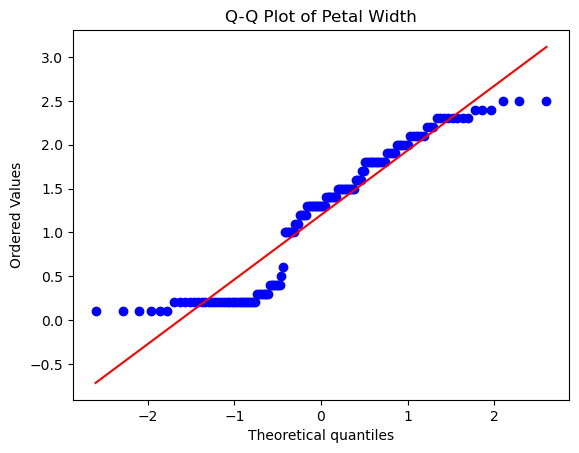

In [9]:
from scipy.stats import probplot
# Convert 'petal width' to numeric
df['petal width'] = pd.to_numeric(df['petal width'], errors='coerce')

# Check available columns
print(df.columns)

# Plot Q-Q plot for 'petal width'
probplot(df['petal width'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Petal Width')
plt.show()

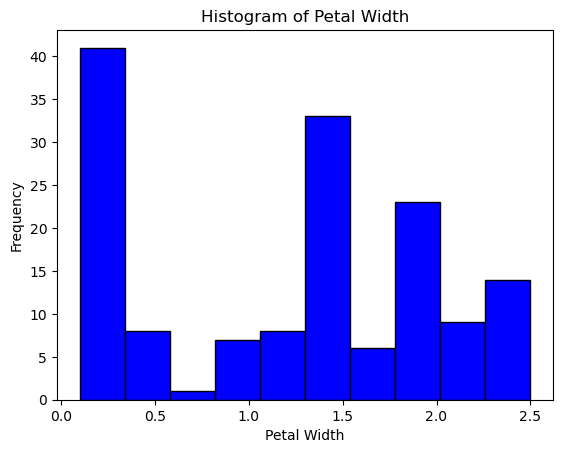

In [10]:
plt.hist(df['petal width'], bins=10, color='blue', edgecolor='black')

plt.title('Histogram of Petal Width')
plt.xlabel('Petal Width')
plt.ylabel('Frequency')
plt.show()

In [11]:
df['petal width'].describe()

count    150.000000
mean       1.198667
std        0.763161
min        0.100000
25%        0.300000
50%        1.300000
75%        1.800000
max        2.500000
Name: petal width, dtype: float64

График QQ (график квантиль-квантиль) — это графический инструмент, используемый для оценки того, соответствует ли набор данных определенному теоретическому распределению, например нормальному распределению. На графике QQ квантили наблюдаемых данных отображаются в сравнении с квантилями ожидаемого распределения. Если точки на графике располагаются примерно по прямой линии, это говорит о том, что данные соответствуют выбранному теоретическому распределению.

Вот как интерпретировать график QQ:

Прямая линия : если точки на графике образуют прямую линию, это указывает на то, что данные точно соответствуют теоретическому распределению (например, нормальному распределению).

Отклонение от линии : Отклонения от прямой линии предполагают отклонения от предполагаемого распределения. Если точки постоянно отклоняются от линии, это указывает на то, что данные не могут быть хорошо смоделированы выбранным распределением.

Теперь давайте соотнесем это с графиком QQ, который вы создали для ширины лепестка Iris Setosa:

Проверка прямой линии : посмотрите на график QQ. Если точки точно следуют прямой линии, это говорит о том, что данные о ширине лепестков Iris Setosa могут быть примерно нормально распределены.

Отклонение от линии : если есть существенные отклонения, особенно если точки изгибаются или демонстрируют систематические закономерности вдали от линии, это может указывать на то, что распределение не совсем соответствует нормальному образцу.

Рассмотрим визуальный аспект. Если график выглядит близко к прямой линии, вы можете сделать вывод, что данные распределены примерно нормально. Однако при небольшом размере выборки визуальный осмотр может оказаться не окончательным, а статистические тесты могут иметь ограничения.

В вашем конкретном случае, имея всего 5 точек данных, сложно сделать однозначные выводы. Если график QQ показывает достаточно прямую линию, вы можете предварительно предположить нормальность. Для более строгого анализа можно рассмотреть возможность увеличения размера выборки и дополнительных статистических тестов.

Центральная предельная теорема предполагает, что распределение выборочного среднего имеет тенденцию быть нормальным, даже если основное распределение не является совершенно нормальным.

777777777Среднее и медиана (50-й процентиль): при нормальном распределении среднее и медиана примерно равны. В ваших данных среднее значение равно 1,205369, а медиана (50-й процентиль) — 1,3. Они близки, но не совсем равны.

Симметрия: Нормальные распределения симметричны. Если данные идеально симметричны, среднее значение, медиана и мода будут в центре. Если есть асимметрия, среднее значение может сместиться в направлении асимметрии.

Стандартное отклонение: Стандартное отклонение дает меру разброса данных. При нормальном распределении около 68% данных попадают в пределы одного стандартного отклонения от среднего значения, 95% — в пределах двух стандартных отклонений и 99,7% — в пределах трех стандартных отклонений.

Процентили. Процентили (25-й, 50-й, 75-й) дают представление о разбросе данных и могут помочь выявить любые асимметрии.

99999999Симметрия: нормальное распределение симметрично, среднее значение и медиана близки. В вашем случае среднее значение (1,205369) и медиана (1,3) относительно близки, что указывает на определенную степень симметрии.

Процентили: процентили (25-й, 50-й, 75-й) дают представление о распределении данных. При нормальном распределении 50% данных попадают в интерквартильный диапазон (IQR) между 25-м и 75-м процентилями. Ваш IQR составляет от 0,3 до 1,8, что является относительно широким показателем.

Стандартное отклонение: Стандартное отклонение является мерой разброса данных. При нормальном распределении около 68% данных попадают в пределах одного стандартного отклонения от среднего значения. В вашем случае примерно 68% данных должны попадать в диапазон от (среднее - стандартное) до (среднее + стандартное), что составляет от 0,444 до 1,966. Это охватывает значительную часть ваших данных.

Однако, чтобы сделать более окончательный вывод о нормальности распределения, рекомендуется дополнить эту сводную статистику визуальными инструментами, такими как гистограммы, графики QQ или статистические тесты на нормальность. Эти инструменты могут дать более четкое представление о характеристиках распределения ваших данных.

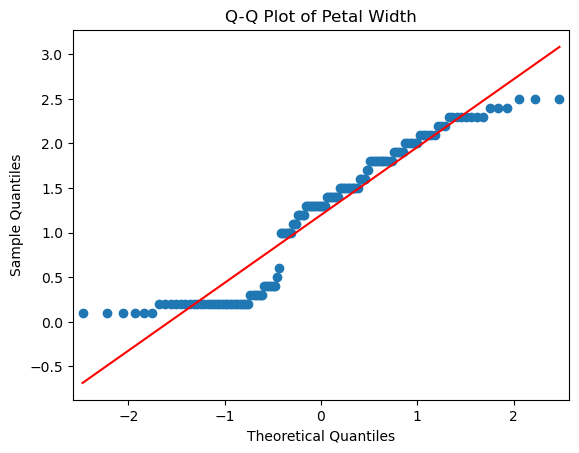

In [12]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

data = df['petal width']

# Create a Q-Q plot
sm.qqplot(data, line='s')  # 's' indicates a standard normal distribution line
plt.title('Q-Q Plot of Petal Width')
plt.show()


In [13]:
from scipy.stats import shapiro

data = df['petal width']

# Perform Shapiro-Wilk test
statistic, p_value = shapiro(data)

print(f"Shapiro-Wilk Statistic: {statistic}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05
if p_value > alpha:
    print("The data appears to be normally distributed (fail to reject H0)")
else:
    print("The data does not appear to be normally distributed (reject H0)")

Shapiro-Wilk Statistic: 0.9026243686676025
P-value: 1.8646931110311016e-08
The data does not appear to be normally distributed (reject H0)


In [14]:
from scipy.stats import anderson

data = df['petal width']

# Perform Anderson-Darling test.
result = anderson(data)

print(f"Anderson-Darling Statistic: {result.statistic}")
print(f"Critical Values: {result.critical_values}")
print(f"Significance Levels: {result.significance_level}")

# Interpret the results
alpha = 0.05
if result.statistic < result.critical_values[2]:
    print("The data appears to be normally distributed (fail to reject H0)")
else:
    print("The data does not appear to be normally distributed (reject H0)")

Anderson-Darling Statistic: 5.062814212935109
Critical Values: [0.562 0.64  0.767 0.895 1.065]
Significance Levels: [15.  10.   5.   2.5  1. ]
The data does not appear to be normally distributed (reject H0)


<div class='alert alert-block alert-warning
            ' style="font-size: 15pt; font-family: cursive; color: #08415C"> 
    <b> <center>Compute the mode of sepal width for the entire dataset. Does this dataset exhibit a clear mode for sepal width, or is it multimodal?
</center> </b>
</div>

In [15]:
import pandas as pd
from statistics import mode

# Extracting sepal width values
sepal_width_values = df['sepal width']

# Compute the mode
sepal_width_mode = mode(sepal_width_values)

print("Mode of sepal width:", sepal_width_mode)

Mode of sepal width: 3.0


Now, regarding whether the dataset exhibits a clear mode for sepal width or is multimodal, you might want to visualize the distribution of sepal width values using a histogram or kernel density plot. This will help you see if there is a single peak (unimodal) or multiple peaks (multimodal) in the distribution. If there is more than one clear peak, the dataset is considered multimodal.

Теперь, что касается того, показывает ли набор данных четкий режим для ширины чашелистиков или является мультимодальным, возможно, вы захотите визуализировать распределение значений ширины чашелистиков с помощью гистограммы или графика плотности ядра. Это поможет вам увидеть, есть ли в распределении один пик (одномодальный) или несколько пиков (мультимодальный). Если имеется более одного четкого пика, набор данных считается мультимодальным.

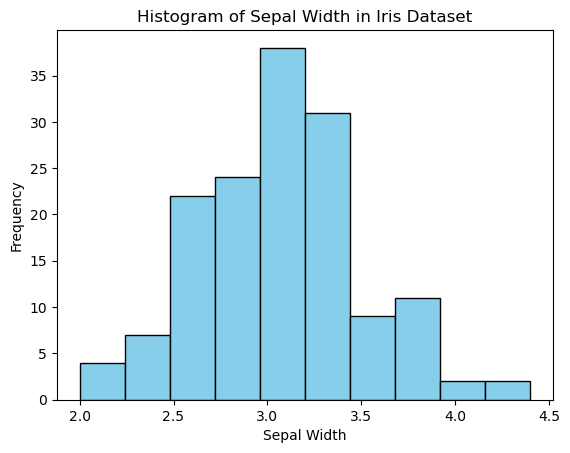

In [16]:
import matplotlib.pyplot as plt

sepal_width_values = df['sepal width']

plt.hist(sepal_width_values, bins=10, color='skyblue', edgecolor='black')

plt.xlabel('Sepal Width')
plt.ylabel('Frequency')
plt.title('Histogram of Sepal Width in Iris Dataset')
plt.show()
# single peak (unimodal)

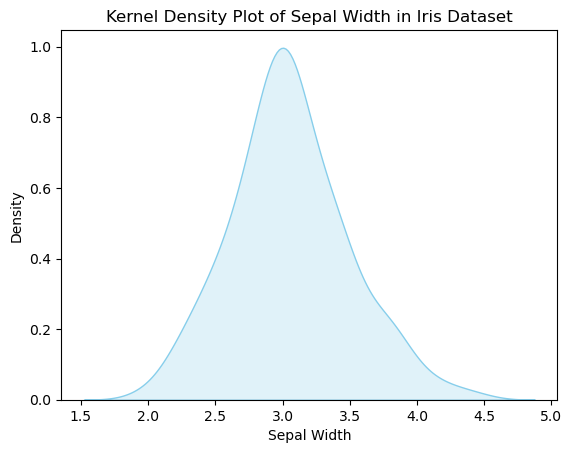

In [17]:
sepal_width_values = df['sepal width']

# Create a kernel density plot
sns.kdeplot(sepal_width_values, fill=True, color='skyblue')


plt.xlabel('Sepal Width')
plt.ylabel('Density')
plt.title('Kernel Density Plot of Sepal Width in Iris Dataset')
plt.show()
# single peak (unimodal)

<div class='alert alert-block alert-warning
            ' style="font-size: 15pt; font-family: cursive; color: #08415C"> 
    <b> <center>Calculate the mean and standard deviation of petal length for Iris Virginica.
</center> </b>
</div>

<div style="font-size: 13pt; font-family: verdana; color: #08415C"> 
    <h4>How does the mean and standard deviation compare to the same attributes in Iris Setosa and Iris Versicolour?
</h4>
</div>

In [18]:
mean_by_class = df.groupby('class')['petal length'].mean()
st_dev_by_class = df.groupby('class')['petal length'].std()

print("Mean by class:")
print(mean_by_class)

print("\nStandard Deviation by class:")
print(st_dev_by_class)

Mean by class:
class
Iris-setosa        1.464
Iris-versicolor    4.260
Iris-virginica     5.552
Name: petal length, dtype: float64

Standard Deviation by class:
class
Iris-setosa        0.173511
Iris-versicolor    0.469911
Iris-virginica     0.551895
Name: petal length, dtype: float64


Mean Comparison:

Iris Virginica has the highest mean petal length among the three classes.
Iris Setosa has the smallest mean petal length.

Standard Deviation Comparison:

Iris Virginica has the highest standard deviation, indicating a greater spread or variability in petal length compared to the other classes.
Iris Setosa has the smallest standard deviation, suggesting less variability in petal length compared to the other classes.

In summary, Iris Virginica tends to have both a higher mean and a higher standard deviation in petal length compared to Iris Setosa and Iris Versicolor. Iris Setosa generally has the smallest mean and standard deviation in petal length, indicating a more concentrated and uniform distribution of petal lengths in this class. Iris Versicolor falls in between with moderate mean and standard deviation values.

Сравнение средних значений:

Iris Virginica имеет самую высокую среднюю длину лепестков среди трех сортов.
Iris Setosa имеет наименьшую среднюю длину лепестков.

Сравнение стандартных отклонений:

Iris Virginica имеет самое высокое стандартное отклонение, что указывает на больший разброс или изменчивость длины лепестков по сравнению с другими сортами.
Iris Setosa имеет наименьшее стандартное отклонение, что свидетельствует о меньшей вариабельности длины лепестков по сравнению с другими сортами.

Таким образом, Iris Virginica имеет тенденцию иметь как более высокое среднее значение, так и более высокое стандартное отклонение длины лепестков по сравнению с Iris Setosa и Iris Versicolor. Iris Setosa, как правило, имеет наименьшее среднее значение и стандартное отклонение длины лепестков, что указывает на более концентрированное и равномерное распределение длин лепестков в этом сорте. Iris Versicolor находится между ними с умеренными значениями среднего значения и стандартного отклонения.

<div class='alert alert-block alert-warning
            ' style="font-size: 15pt; font-family: cursive; color: #08415C"> 
    <b> <center>Investigate the median of sepal length for Iris Setosa. How does the median compare to the mean in this case, and what does it suggest about the distribution of sepal length in this class?
</center> </b>
</div>

In [19]:
setosa_mean = df[df['class'] == 'Iris-setosa']['sepal length'].mean()
setosa_median = df[df['class'] == 'Iris-setosa']['sepal length'].median()

print(f"Iris Setosa - Mean Sepal Length: {setosa_mean:.2f}")
print(f"Iris Setosa - Median Sepal Length: {setosa_median:.2f}")

Iris Setosa - Mean Sepal Length: 5.01
Iris Setosa - Median Sepal Length: 5.00


The mean and median are very close, indicating that the distribution of sepal length in Iris Setosa is likely symmetric or close to symmetric. When the mean and median are approximately equal, it suggests that the data is centered, and the distribution is not highly skewed.

Среднее значение и медиана очень близки, что указывает на то, что распределение длины чашелистиков у Iris Setosa, вероятно, симметрично или близко к симметричному. Когда среднее значение и медиана приблизительно равны, это говорит о том, что данные центрированы и распределение не сильно искажено.

<div class='alert alert-block alert-warning
            ' style="font-size: 15pt; font-family: cursive; color: #08415C"> 
    <b> <center>Determine the interquartile range (IQR) of petal width for each class. Are there any significant differences in the spread of petal width among the three classes?
</center> </b>
</div>

In [20]:
setosa = df[df['class'] == 'Iris-setosa']['petal width']
versicolor = df[df['class'] == 'Iris-versicolor']['petal width']
virginica = df[df['class'] == 'Iris-virginica']['petal width']

setosa_iqr = setosa.quantile(0.75) - setosa.quantile(0.25)
versicolor_iqr = versicolor.quantile(0.75) - versicolor.quantile(0.25)
virginica_iqr = virginica.quantile(0.75) - virginica.quantile(0.25)

print(f"IQR of Petal Width for Iris Setosa: {setosa_iqr:.2f}")
print(f"IQR of Petal Width for Iris Versicolor: {versicolor_iqr:.2f}")
print(f"IQR of Petal Width for Iris Virginica: {virginica_iqr:.2f}")

IQR of Petal Width for Iris Setosa: 0.10
IQR of Petal Width for Iris Versicolor: 0.30
IQR of Petal Width for Iris Virginica: 0.50


The increasing order of IQRs (Iris Setosa < Iris Versicolor < Iris Virginica) indicates an increase in the spread or variability of petal width from Iris Setosa to Iris Virginica. Therefore, there are significant differences in the spread of petal width among the three classes, with Iris Virginica having the widest spread, followed by Iris Versicolor and Iris Setosa with the smallest spread.

Возрастающий порядок расположения ирисов (Iris Setosa < Iris Versicolor < Iris Virginica) указывает на увеличение разброса или изменчивости ширины лепестков от Iris Setosa к Iris Virginica. Таким образом, существуют значительные различия в распределении ширины лепестков между тремя классами, причем Iris Virginica имеет самое широкое распространение, за ним следуют Iris Versicolor и Iris Setosa с наименьшим распространением.

<div class='alert alert-block alert-warning
            ' style="font-size: 15pt; font-family: cursive; color: #08415C"> 
    <b> <center>Calculate the mean and standard deviation of sepal length for all instances where sepal width is less than 3 cm. How does this subset of data differ from the dataset as a whole in terms of sepal length?
</center> </b>
</div>

In [21]:
subset_data = df[df['sepal width'] < 3]

overall_mean = df['sepal length'].mean()
overall_std = df['sepal length'].std()

subset_mean = subset_data['sepal length'].mean()
subset_std = subset_data['sepal length'].std()
print('Subset data')
print(f"Subset Mean Sepal Length: {subset_mean:.2f}")
print(f"Subset Standard Deviation of Sepal Length: {subset_std:.2f}")
print('\nWhole data')
print(f"Overall Mean Sepal Length: {overall_mean:.2f}")
print(f"Overall Standard Deviation of Sepal Length: {overall_std:.2f}")

Subset data
Subset Mean Sepal Length: 5.95
Subset Standard Deviation of Sepal Length: 0.68

Whole data
Overall Mean Sepal Length: 5.84
Overall Standard Deviation of Sepal Length: 0.83


Подмножество данных, где ширина чашелистика составляет менее 3 см, имеет более высокую среднюю длину чашелистика и меньшее стандартное отклонение по сравнению с набором данных в целом. Это говорит о том, что в среднем длина чашелистиков имеет тенденцию быть немного больше в тех случаях, когда ширина чашелистиков составляет менее 3 см. Кроме того, значения длины чашелистиков в этом подмножестве менее изменчивы или распределены вокруг среднего значения по сравнению со всем набором данных.

Важно отметить, что эти различия могут быть незначительными, и интерпретация может варьироваться в зависимости от контекста и характера набора данных.

The subset of data, where sepal width is less than 3 cm, has a higher mean sepal length and a smaller standard deviation compared to the dataset as a whole. This suggests that, on average, the sepal length tends to be slightly longer in instances where sepal width is less than 3 cm. Additionally, the sepal length values in this subset are less variable or dispersed around the mean compared to the entire dataset.

It's important to note that these differences might be subtle, and the interpretation may vary based on the context and the nature of the dataset.

<div class='alert alert-block alert-warning
            ' style="font-size: 15pt; font-family: cursive; color: #08415C"> 
    <b> <center>Compute the probability that a randomly selected flower from the dataset belongs to the class Iris Versicolour based on the sepal width being between 2.5 cm and 3.0 cm.
</center> </b>
</div>

In [22]:
total_flowers_in_range = df[(df['sepal width'] >= 2.5) & (df['sepal width'] <= 3.0)].shape[0]

versicolour_flowers_in_range = df[(df['sepal width'] >= 2.5) & (df['sepal width'] <= 3.0) & (df['class'] == 'Iris-versicolor')].shape[0]

probability_versicolour = versicolour_flowers_in_range / total_flowers_in_range

print(f"Probability of a randomly selected flower belonging to Iris Versicolour (sepal width between 2.5 cm and 3.0 cm): {probability_versicolour:.2f}")

Probability of a randomly selected flower belonging to Iris Versicolour (sepal width between 2.5 cm and 3.0 cm): 0.46


<div class='alert alert-block alert-warning' style="font-size: 15pt; font-family: cursive; color: #08415C"> 
    <b> <center>For each class, calculate the 10th and 90th percentiles of petal length. What do these percentiles reveal about the range of petal lengths in each class?
</center></b>
</div>

In [23]:
percentiles_by_class = df.groupby('class')['petal length'].quantile([0.1, 0.9]).unstack()

print("10th and 90th percentiles of petal length for each class:")
print(percentiles_by_class)

10th and 90th percentiles of petal length for each class:
                  0.1   0.9
class                      
Iris-setosa      1.30  1.70
Iris-versicolor  3.59  4.80
Iris-virginica   4.90  6.31


For Iris-setosa, the 10th percentile is 1.3, indicating that 10% of Iris-setosa flowers have a petal length of 1.3 or less. The 90th percentile is 1.5, suggesting that 90% of Iris-setosa flowers have a petal length of 1.5 or less.

These percentiles provide a summary of the distribution of petal lengths within each class, revealing the range of petal lengths that capture a specified percentage of the data.

Для Iris-setosa 10-й процентиль равен 1,3, что указывает на то, что 10% цветков Iris-setosa имеют длину лепестка 1,3 или меньше. 90-й процентиль равен 1,5, что говорит о том, что 90% цветков ириса-сетозы имеют длину лепестка 1,5 или меньше.

Эти процентили дают сводную информацию о распределении длин лепестков внутри каждого класса, раскрывая диапазон длин лепестков, которые охватывают определенный процент данных.

<div class='alert alert-block alert-warning' style="font-size: 15pt; font-family: cursive; color: #08415C"> 
    <b><center>Investigate the relationship between sepal length and sepal width by calculating the correlation coefficient for each class. Do the classes show different correlations between these two attributes?
</center></b>
</div>

In [24]:
correlation_by_class = df.groupby('class').apply(lambda x: x['sepal length'].corr(x['sepal width']))

# Display the results
print("Correlation coefficient between sepal length and sepal width for each class:")
print(correlation_by_class)

Correlation coefficient between sepal length and sepal width for each class:
class
Iris-setosa        0.746780
Iris-versicolor    0.525911
Iris-virginica     0.457228
dtype: float64


These correlation coefficients indicate the strength and direction of the linear relationship between sepal length and sepal width for each class. A positive correlation indicates a positive linear relationship, while a negative correlation indicates a negative linear relationship. The magnitude of the correlation coefficient reflects the strength of the relationship, with values closer to 1 or -1 indicating a stronger linear association.